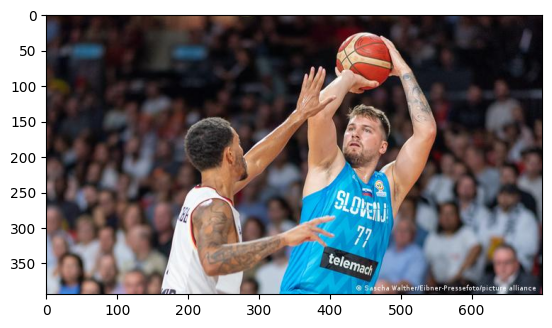

In [9]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import clustering_algorithms

# Load an image:
image_path = 'pic2.jpg'
image = Image.open(image_path)
pixels = image.load()
width, height = image.size

# Display image in notebook:
%matplotlib inline
imshow(np.asarray(image))

In [10]:
# Turn image into list of vectors (1 vector / pixel):
vector_list = []
for x in range(width):
    for y in range(height):
        current_point = []
        current_point.append(pixels[x, y][0])
        current_point.append(pixels[x, y][1])
        current_point.append(pixels[x, y][2])

        current_vector = np.array(current_point)
        vector_list.append(current_vector)

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

Image file with dimensions 700x394 pixels turned into 275800 vectors.


In [11]:
# Perform clustering on the vectors:
dbscan_clusters = clustering_algorithms.dbscan(vector_list, minpts=5, epsilon=50)
kmeans_clusters = clustering_algorithms.kmeans(vector_list, 4)

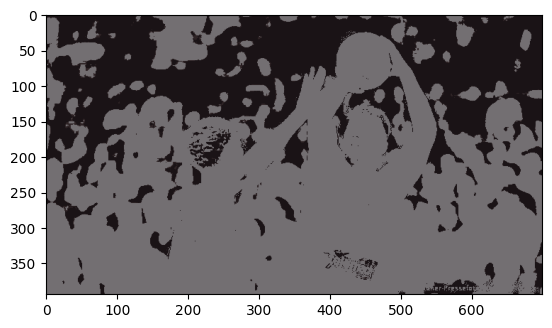

In [12]:
# Convert the clusters back into an image:
# This code assumes that the result is a list that
# is as long as the list of points and contains the 
# cluster number for each point with the corresponding
# position in the list.
# E. g. [1, 4, 2, 1, 1, 4, 2, 2, 3, ...])
def clusters_to_image(cluster_per_point_list: list, points: list, width, height):
    assert(len(cluster_per_point_list) == len(points))

    cluster_count = max(cluster_per_point_list) + 1
    inverted_clusters = [[] for _ in range(cluster_count)]

    for i in range(len(cluster_per_point_list)):
        inverted_clusters[cluster_per_point_list[i]].append(points[i])

    mean_colors = [np.array([0, 0, 0]) for _ in range(cluster_count)]
    counter =  [0 for _ in range(cluster_count)]
    for i in range(cluster_count):
        for elem in inverted_clusters[i]:
            mean_colors[i] = np.add(mean_colors[i], elem)
            counter[i] += 1

        mean_colors[i] = np.divide(mean_colors[i], np.array([counter[i], counter[i], counter[i]]))

    clustered_image = Image.new('RGB', (width, height))
    pix = clustered_image.load()
    for x in range(width):
        for y in range(height):
            cl_id = cluster_per_point_list[y + x * height]
            if cl_id == -1:
                pix[x, y] = (0, 0, 0)
            else:
                curr_pixel = [int(x) for x in mean_colors[cl_id]]
                pix[x, y] = tuple(curr_pixel)

    return clustered_image

clustered_image = clusters_to_image(
    kmeans_clusters, vector_list, width, height)
clustered_image2 = clusters_to_image(
    dbscan_clusters, vector_list, width, height)
# Display the clustered image:
%matplotlib inline
imshow(np.asarray(clustered_image))